# Lab: CV w/CNNs

# Part 1: Libraries & Preprocessing

### Step 1: Libraries

Bring in the germane libraries.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# TensorFlow / Keras functions
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

### Step 2: Data

Download and fetch the data with the following Python code (Note: We will use faces.images for X.)

In [2]:
# Load the data
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
X = faces.images
y = faces.target.reshape(-1, 1)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/hank/scikit_learn_data


### Step 3: Sample Image

Select an image from this dataset and display it (Hint: Use the plt.cm.gray color map with plt.imshow function).

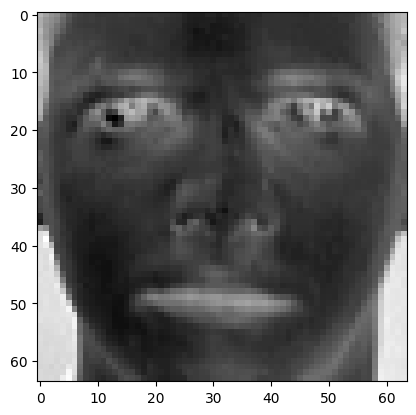

In [9]:
# Selecting an image
# An example that we'll explore
img_index = 0
example = X[0]

plt.imshow(example, plt.cm.binary)

### Step 4: Training and testing sets

Setup training and testing sets . Use a 50/50 split for each class (5 training images and 5 test images per person). Print the dimension of each of the feature (image) matrices. Because this is a small dataset, we will also use the test set for validation.

In [18]:
# Creating the training and testing sets with a 50/50 split for each class 
# (5 training images and 5 test images per person).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# # Check class balance in the training set and the test set.
# unique_values_train, counts_train = np.unique(y_train, return_counts=True)
# unique_values_test, counts_test = np.unique(y_test, return_counts=True)

# print(unique_values_train)
# print(counts_train)
# print(unique_values_test)
# print(counts_test)

print(X_train.shape)
print(X_test.shape)


(200, 64, 64)
(200, 64, 64)


### Step 5: Vector conversion

Convert the vector of response variables to a matrix with 40 columns, with indicators for which person it is (one-hot encoded vectors). Print the dimensions of the new response vectors.

In [19]:
# Conversion
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# print(y_train.shape)
# print(y_test.shape)

(200, 40)
(200, 40)


### Step 6: Reshape arrays

Reshape the image arrays so that they have 4 dimensions: (number of images, width of image, height of image, number of channels). For example, the array of training images should be (200, 64, 64, 1). Print the dimensions of the new image arrays.

In [20]:
# Reshape
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

# print(X_train.shape)
# print(X_test.shape)


(200, 64, 64, 1)
(200, 64, 64, 1)


## Part 2: Model 1

### Step 7: Model 1's Architecture

Fit a convolutional neural network using the following architecture, and print the output from training.
*   1 convolutional layer with:
  * 16 filters (neurons)
  * a window size of 3
  * stride size of 1
  * ReLU activation function
  * padding so that the feature is the same size as the original image
*   1 max pooling layer with:
  * window size of 2
  * stride size of 2
  * no padding
*   1 fully connected output layer with:
  * 40 nodes for each face to predict
  * softmax activation function
*   For training, use the Adam optimizer, 20 epochs, a batch size of 10, and the categorical cross entropy loss function.

In [22]:
input_tensor = Input(shape=(64, 64, 1))

# Convolution Neural Network Model
model1 = Sequential([
    Conv2D(16, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(40, activation='softmax')
])

/opt/anaconda3/envs/ml-env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Compiling model1
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model1.fit(X_train, y_train, epochs=20, batch_size=10)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0100 - loss: 4.9673    
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0550 - loss: 3.7547   
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3800 - loss: 3.2196
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6200 - loss: 2.7286
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6800 - loss: 2.1571
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8300 - loss: 1.5085
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8950 - loss: 1.0134
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9400 - loss: 0.6419
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9300 - loss: 0.4566
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9800 - loss: 0.2932
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9850 - loss: 0.1961
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.00

### Step 8: Model 1's loss and accuracy

Print the loss and accuracy on the test set.

In [25]:
# Loss and Accuracy
loss, accuracy = model1.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9250 - loss: 0.4131 
Loss: 0.4130736291408539
Accuracy: 0.925000011920929


### Step 9: Print image

Pick one of the images from the test set, and print the image.

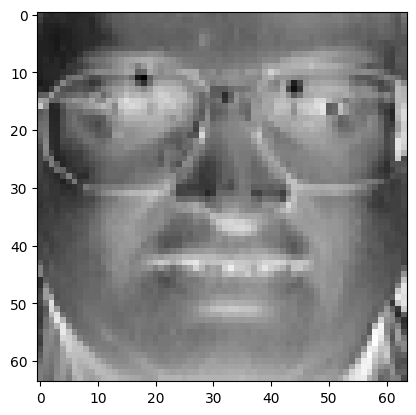

In [26]:
# An image
img_index = 0
example = X_test[0].reshape(64, 64)

plt.imshow(example, plt.cm.binary)

### Step 10: Feature maps

For the image you selected in (9), print the images of the feature maps from both the convolutional and pooling layers.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

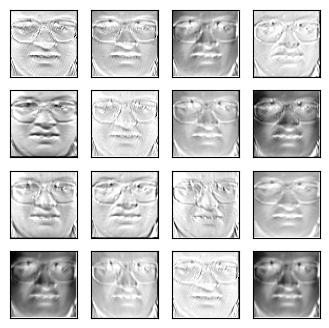

In [28]:
# Feature maps
# Create list of layer outputs
layer_outputs = [layer.output for layer in model1.layers]

# Create a model that will return the outputs at each layer
layers_model = keras.Model(inputs=model1.layers[0].input, outputs=layer_outputs)

# Get predictions for each layer of the network
outputs = layers_model.predict(example.reshape(1, 64, 64, 1))
conv_output = outputs[0]
pooling_output = outputs[1]

# For loop
plt.figure(figsize=(4, 4))
for j in range(4 * 4):
        plt.subplot(4, 4, j + 1)
        plt.imshow(conv_output[0, :, :, j], cmap=plt.cm.binary)
        plt.xticks(())
        plt.yticks(())

plt.show

## Part 3: Model 2




### Step 11: Model 2's Architecture

Fit the model from (7) again, but this time use a window size of 9 for the convolution layer.

In [30]:
# Change model1 so that it has a window size of 9.
model2 = Sequential([
    Conv2D(16, (9, 9), strides=(1, 1), padding='same', activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(40, activation='softmax')
])

# Convolution Neural Network Model


/opt/anaconda3/envs/ml-env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# Compiling model2
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model2.fit(X_train, y_train, epochs=20, batch_size=10)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0350 - loss: 3.9015
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1650 - loss: 3.6683
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1450 - loss: 3.6345
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3250 - loss: 3.5147
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4050 - loss: 3.4219
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4250 - loss: 3.0216
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7000 - loss: 2.2937
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8200 - loss: 1.4564
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8750 - loss: 0.8369
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9400 - loss: 0.5754
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9800 - loss: 0.3097
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9750 - lo

### Step 12: Model 2's loss and accuracy

Print the loss accuracy on the test set.

In [33]:
# Loss and Accuracy
loss2, accuracy2 = model2.evaluate(X_test, y_test)
print(f"Loss: {loss2}")
print(f"Accuracy: {accuracy2}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9200 - loss: 0.3827 
Loss: 0.38267573714256287
Accuracy: 0.9200000166893005


### Step 13: Feature Maps

Print the feature maps for the model in for the same image you used in (9) and (10).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

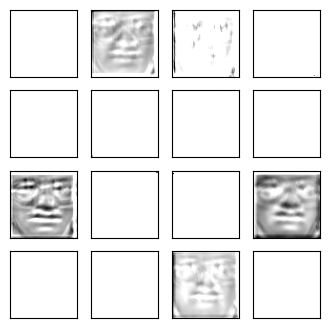

In [34]:
# Feature maps
# Create list of layer outputs
layer_outputs2 = [layer.output for layer in model2.layers]

# Create a model that will return the outputs at each layer
layers_model2 = keras.Model(inputs=model2.layers[0].input, outputs=layer_outputs2)

# Get predictions for each layer of the network
outputs2 = layers_model2.predict(example.reshape(1, 64, 64, 1))
conv_output2 = outputs2[0]
pooling_output2 = outputs2[1]

# For loop
plt.figure(figsize=(4, 4))
for j in range(4 * 4):
        plt.subplot(4, 4, j + 1)
        plt.imshow(conv_output2[0, :, :, j], cmap=plt.cm.binary)
        plt.xticks(())
        plt.yticks(())

plt.show

## Part IV: Model comparison & model optimization


### Step 14: Model comparison

Comment on the differences in the features maps between this model and the previous one. Which network gave better predictions on the test set?

The models performed comparably on the test set. Model1 had slightly higher accuracy, but model2 had slightly lower loss. The feature space from model 1 does seem to be richer: all 16 features mapped into meaningful images. In contrast, of the 16 features in model2 only 4 or 5 seem to map meaningfully.

### Step 15: Model 3- Optimized neural network

Optimize the neural network to improve the accuracy on the test set. You should try to get a better accuracy than both of the previous models.  Consider changing the following, then print the accuracy on the test set:
*   Number of convolutional and pooling layers
*   Number of filters in the convolutional layer
*   Window size
*   Number of fully connected layers and neurons
*   Regularization (L1/L2 penalty, dropout, early stopping)
*   Number of epochs and batch size

Call this model `model3`.

In [113]:
# Convolution Neural Network Model
# I'm adding additional convolutional and max pooling layers to allow for more complex features
# I'm also adding a dropout layer and l2 regularization to help prevent overfitting
model3 = Sequential([
    Conv2D(64,
        (3, 3), 
        strides=(1, 1), 
        padding='same', 
        activation='relu', 
        input_shape=(64, 64, 1), 
        kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    Conv2D(16,
        (3, 3),
        strides=(1, 1),
        padding='same',
        activation='relu',
        kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    Conv2D(8,
        (5, 5),
        strides=(1, 1),
        padding='same',
        activation='relu',
        kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Flatten(),
    tf.keras.layers.Dropout(0.3),
    Dense(40, activation='softmax')
])

In [114]:
# Compiling model3
model3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model3.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0100 - loss: 4.0404  
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0450 - loss: 3.9177
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0150 - loss: 3.8517
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0350 - loss: 3.8068 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0100 - loss: 3.7840
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0250 - loss: 3.7607
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0200 - loss: 3.7354
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0400 - loss: 3.6929 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0400 - loss: 3.6248
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1500 - loss: 3.2608
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4600 - loss: 2.3606
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/

In [115]:
loss3, accuracy3 = model3.evaluate(X_test, y_test)
print(f"Loss: {loss3}")
print(f"Accuracy: {accuracy3}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9400 - loss: 0.3155  
Loss: 0.31549084186553955
Accuracy: 0.9399999976158142


### Step 16: Reflection on Model 3

I added additional convolutional layers to allow the model to identify more complex features within the images. I also added dropout and l2 regularization to prevent the model from overfitting to the training data. The model's convergence seemed to be very sentive to the l2 regularization parameter (going above 0.01 often led to the model failing to fit the data properly at all), but dropout seemed to be particularly helpful for preventing the model from overfitting and allowing for better performance on the test set.